In [1]:
import numpy as np

In [2]:
X = np.array([5.9, 2.45, 3.32, 6.88, 3.09, 8.13, 3.76])

# dd0f=1, это хначит, что мы делим не на n, а на n-1 в формуле выше
#ddof = delta degrees of freedom
print(f'Оценка сигма^2: {np.var(X, ddof=1)}')

Оценка сигма^2: 4.723866666666668


In [3]:
def sample_statistics(number_of_experiments, stat_function, sample_size, sample_distr):
    stat_sample = []
    for _ in range(number_of_experiments):
        sample = sample_distr.rvs(sample_size)
        stat = stat_function(sample)
        stat_sample.append(stat)
    return stat_sample

C:\Users\6642b\AppData\Local\Temp\ipykernel_11592\1439595356.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(current_sample, label='Эмпирическое распределение')
C:\Users\6642b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\6642b\AppData\Local\Temp\ipykernel_11592\1439595356.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure

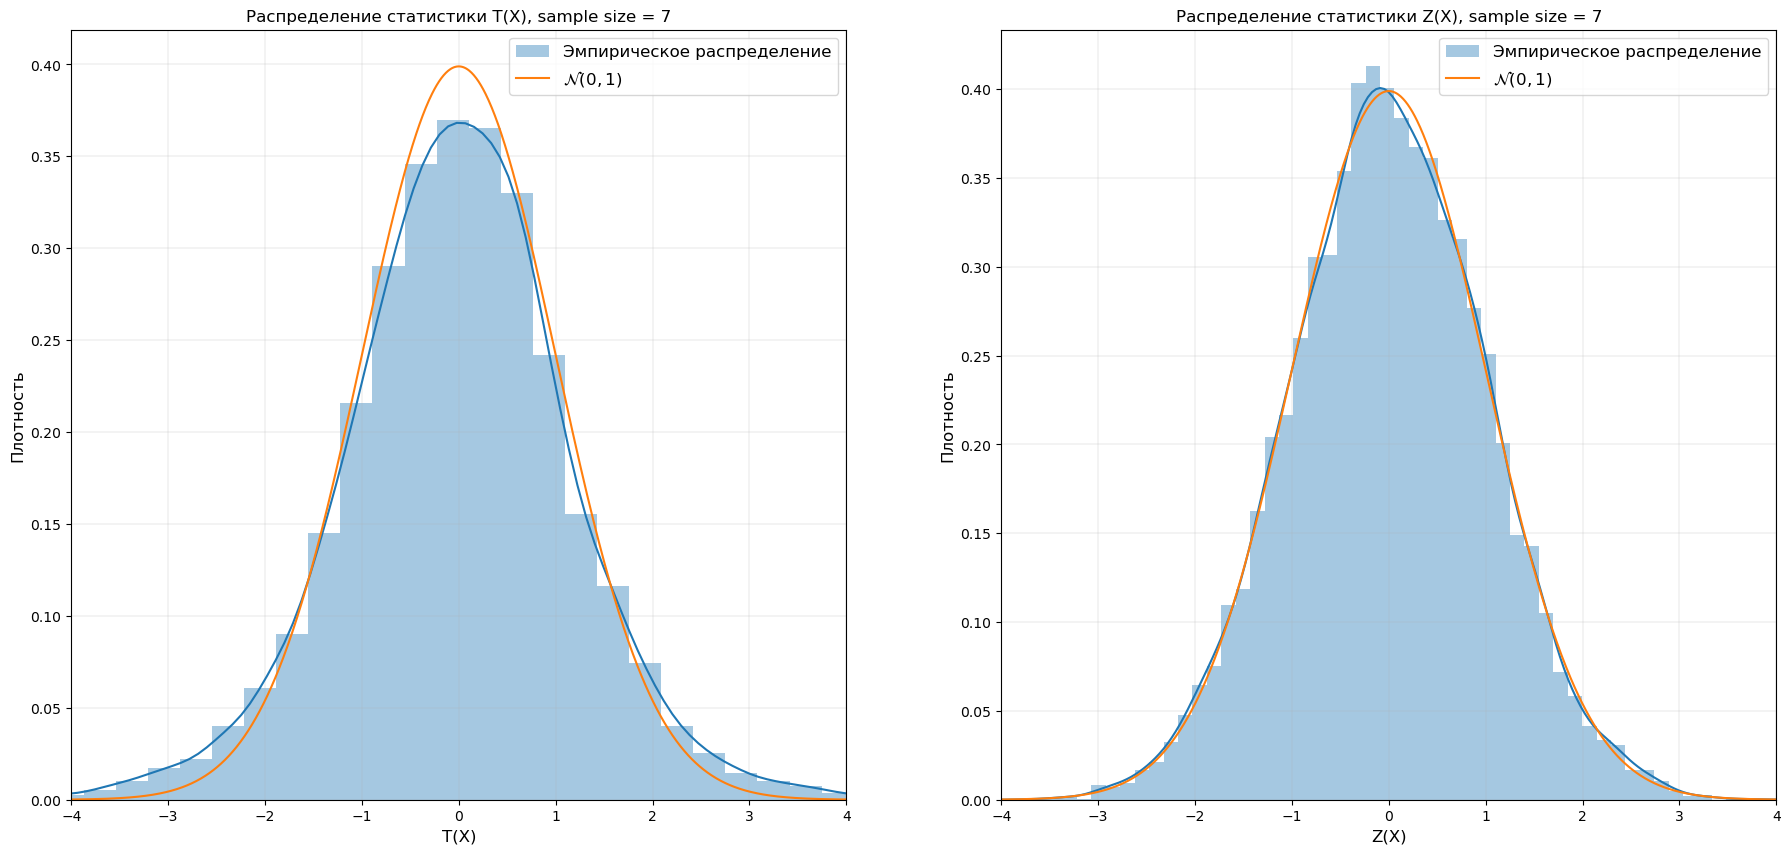

In [4]:
from scipy.stats import norm
np.random.seed(8)

sample_size = 7
M = 10000
sample_distr = norm(loc=5, scale=3)

T_X = lambda sample: np.sqrt(sample_size) * (np.mean(sample) - sample_distr.mean()) / np.sqrt(np.var(sample, ddof=1))
Z_X = lambda sample: np.sqrt(sample_size) * (np.mean(sample) - sample_distr.mean()) / sample_distr.std()
samples = {
    'T(X)': sample_statistics(
    number_of_experiments=M, stat_function=T_X, sample_size=sample_size, sample_distr=sample_distr),
    
    'Z(X)': sample_statistics(
    number_of_experiments=M, stat_function=Z_X, sample_size=sample_size, sample_distr=sample_distr)
}

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 10))

for i, name in enumerate(['T(X)', 'Z(X)']):
    plt.subplot(1, 2, i + 1)
    current_sample = samples[name]
    l_bound, r_bound = [-4, 4]
    
    x = np.linspace(l_bound, r_bound, 1000)
    plt.title(f'Распределение статистики {name}, sample size = {sample_size}', fontsize=12)
    sns.distplot(current_sample, label='Эмпирическое распределение')
    plt.plot(x, norm(0, 1).pdf(x), label='$\mathcal{N}(0, 1)$')
    plt.legend(fontsize=12)
    plt.xlabel(f'{name}', fontsize=12)
    plt.xlim((l_bound, r_bound))
    plt.ylabel('Плотность', fontsize=12)
    plt.grid(linewidth=0.2)

plt.show()

In [5]:
X = np.array([5.9, 2.45, 3.32, 6.88, 3.09, 8.13, 3.76])

In [6]:
t_stat = (np.mean(X) - 7) / np.sqrt((np.var(X, ddof=1) / 7))
t_stat

-2.6902489974105612

In [7]:
from scipy.stats import t
p_value = t(7 - 1).cdf(t_stat)
p_value

0.01802035750889251

In [8]:
from scipy.stats import ttest_1samp
ttest_1samp(X, popmean=7, alternative='less')

TtestResult(statistic=-2.690248997410561, pvalue=0.01802035750889251, df=6)

In [9]:
left_bound, right_bound = t.interval(confidence=0.95, loc=np.mean(X), df=len(X)-1, 
                                     scale=np.sqrt(np.var(X, ddof=1) / 7))
print("Левая граница:", left_bound)
print("Правая граница:", right_bound)

Левая граница: 2.7798978901080718
Правая граница: 6.800102109891928


In [10]:
from scipy.stats import sem
left_bound, right_bound = t.interval(confidence=0.95, loc=np.mean(X), df=len(X)-1, 
                                     scale=sem(X))
print("Левая граница:", left_bound)
print("Правая граница:", right_bound)

Левая граница: 2.7798978901080718
Правая граница: 6.800102109891928


Разберем двубырочный T-test. Возьмем две выборки по 1000 элементов. И сравним их матожедание и найдем, какая разница может быть у их матожиданий с помощью доверительного интервала

In [11]:
from scipy.stats import *
np.random.seed(42)
X = expon(scale=1100).rvs(1000)
Y = norm(loc=980, scale=30).rvs(1000)

ttest_ind(X, Y, equal_var="False", alternative='greater')

TtestResult(statistic=2.5645688722251325, pvalue=0.005201444828970756, df=1998.0)

По большей степени нам интересно только p-value, поэтому выводим только его. Если мы хотим односторонний pvalue то обязаткльно указываем `alternative='greater'`

In [12]:
ttest_ind(X, Y, equal_var="False", alternative='greater').pvalue

0.005201444828970756

Ну и ищем доверительный интервал

In [13]:
from statsmodels.stats.weightstats import *
cm = CompareMeans(DescrStatsW(X), DescrStatsW(Y))
cm.tconfint_diff(usevar='unequal')

(20.38059303711826, 153.1987434094657)

Решим аленькую задачу. У нас есть приложение которое пользователи используют в среднем 20 раз в день. Коллега чтото поменял для нескольких пользователей (64) и замутил эксперимент, как изменится среднее. Получилось 18.4, стандартное отклонение равно 4

In [35]:
a = range(100)
left, right = t.interval(0.95, len(a)-1, loc=np.mean(a), scale=sem(a))
print(f'{left} -- {right}')

43.74349058328968 -- 55.25650941671032


In [48]:
normal = norm(loc=22, scale=1)
normal

In [49]:
left, right = t.interval(0.95, 63, loc=18.4, scale=4)
print(f'{left} -- {right}')

10.406637832911215 -- 26.39336216708878


In [50]:
Z_test = (22 - 20) / (1 / np.sqrt(64))
Z_test

16.0

In [51]:
p_value = normal.cdf(Z_test)
1 - p_value

0.9999999990134123